In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
PATH = "~~~~~~~~~~~~~"

In [ ]:
data = pd.read_csv(PATH + "train.csv")
test = pd.read_csv(PATH + "test.csv")
sample_submission = pd.read_csv(PATH + "sample_submission.csv")

In [ ]:
data.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


# Part1: EDA

## Distribution of Target

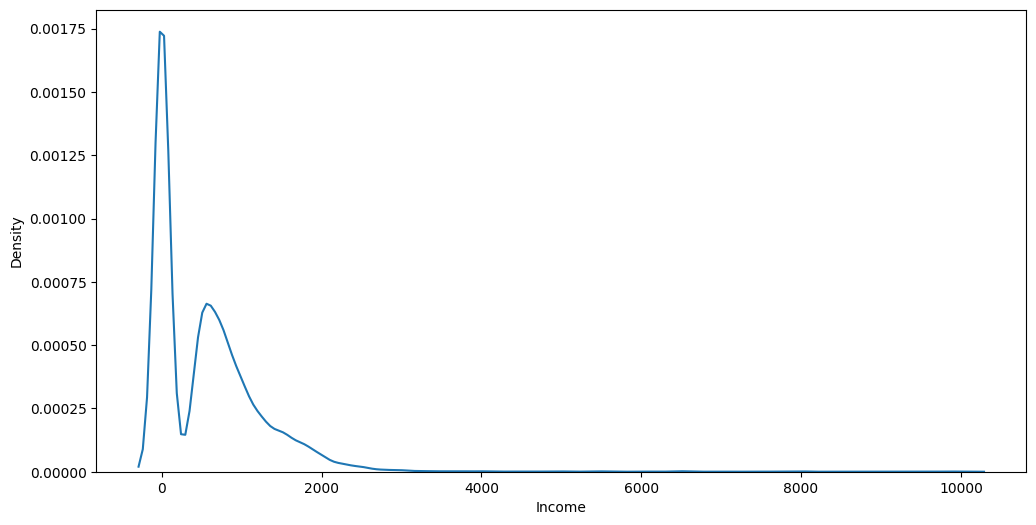

In [ ]:

plt.figure(figsize = (12, 6))
sns.kdeplot(x = data['Income'])
plt.show()

## Distribution of Features

In [ ]:
data_desc = pd.DataFrame(index = data.columns)
data_desc['count'] = data.count()
data_desc['null'] = data.isnull().sum()
data_desc['nunique'] = data.nunique()
data_desc['%nunique'] = data_desc['nunique'] / len(data) * 100
data_desc['type'] = data.dtypes
data_desc = pd.concat([data_desc, data.describe().T], axis = 1)
data_desc

,count,null,nunique,%nunique,type,count,mean,std,min,25%,50%,75%,max
ID,20000,0,20000,100.000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20000,0,91,0.455,int64,20000.0,35.63250,17.994414,0.0,23.0,34.0,47.0,90.0
Gender,20000,0,2,0.010,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Status,20000,0,17,0.085,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment_Status,20000,0,8,0.040,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Working_Week (Yearly),20000,0,53,0.265,int64,20000.0,34.94305,22.254592,0.0,7.0,52.0,52.0,52.0
Industry_Status,20000,0,24,0.120,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation_Status,20000,0,15,0.075,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,20000,0,5,0.025,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hispanic_Origin,20000,0,10,0.050,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_desc = pd.DataFrame(index = test.columns)
test_desc['count'] = test.count()
test_desc['null'] = test.isnull().sum()
test_desc['nunique'] = test.nunique()
test_desc['%nunique'] = test_desc['nunique'] / len(test) * 100
test_desc['type'] = test.dtypes
test_desc = pd.concat([test_desc, test.describe().T], axis = 1)
test_desc

,count,null,nunique,%nunique,type,count,mean,std,min,25%,50%,75%,max
ID,10000,0,10000,100.00,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,0,91,0.91,int64,10000.0,35.9450,17.947835,0.0,23.0,35.0,47.0,90.0
Gender,10000,0,2,0.02,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Status,10000,0,17,0.17,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment_Status,10000,0,8,0.08,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Working_Week (Yearly),10000,0,53,0.53,int64,10000.0,35.1818,22.187519,0.0,8.0,52.0,52.0,52.0
Industry_Status,10000,0,24,0.24,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation_Status,10000,0,15,0.15,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,10000,0,5,0.05,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hispanic_Origin,10000,0,10,0.10,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
CAT = [c for c in test.columns if c != 'ID' and data[c].dtype == 'object']
NUM = [c for c in test.columns if data[c].dtype != 'object']

### Numerial Features

- Age

- Working_Week

- Gains: 이익

- Losses: 지출

- Dividends : 배당금

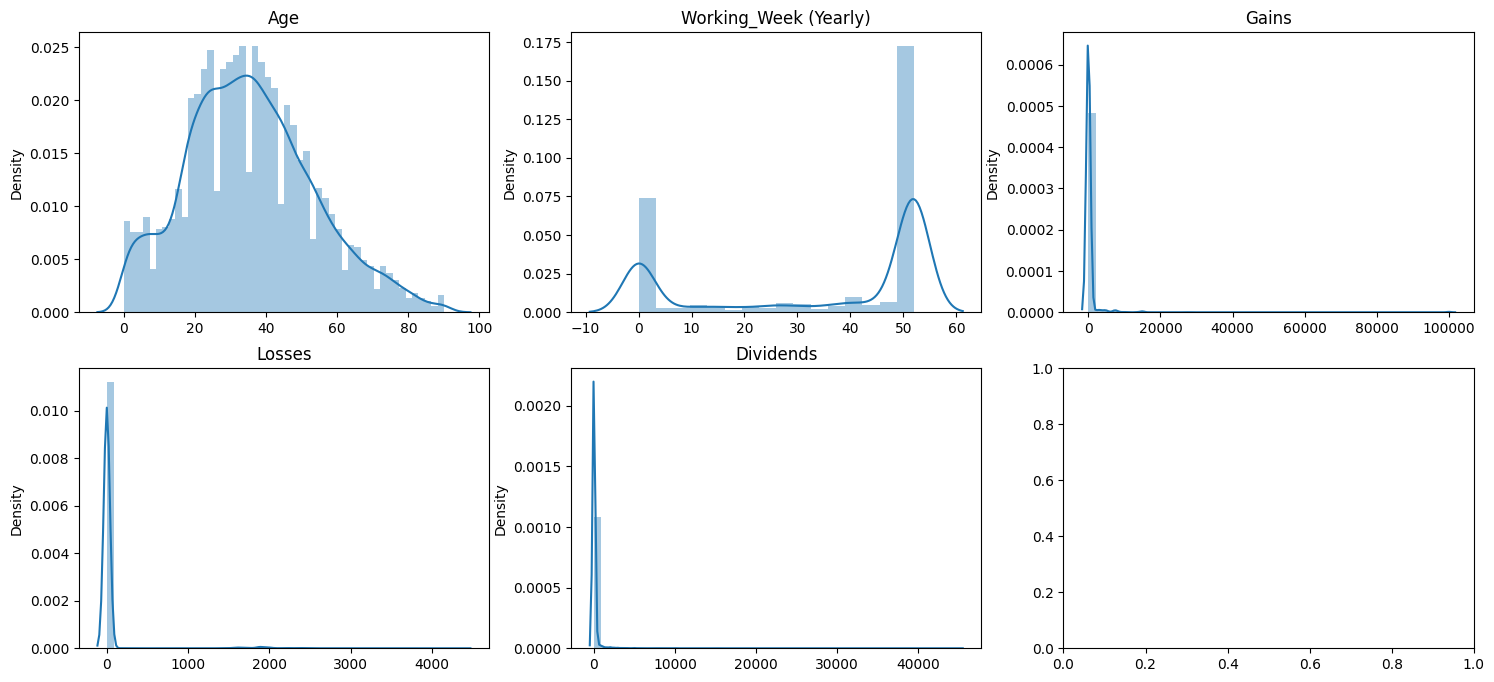

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (18, 8))
ax = ax.flatten()
for i, column in enumerate(NUM):
  sns.distplot(x = data[column], ax = ax[i])
  ax[i].set_title(column)

plt.show()

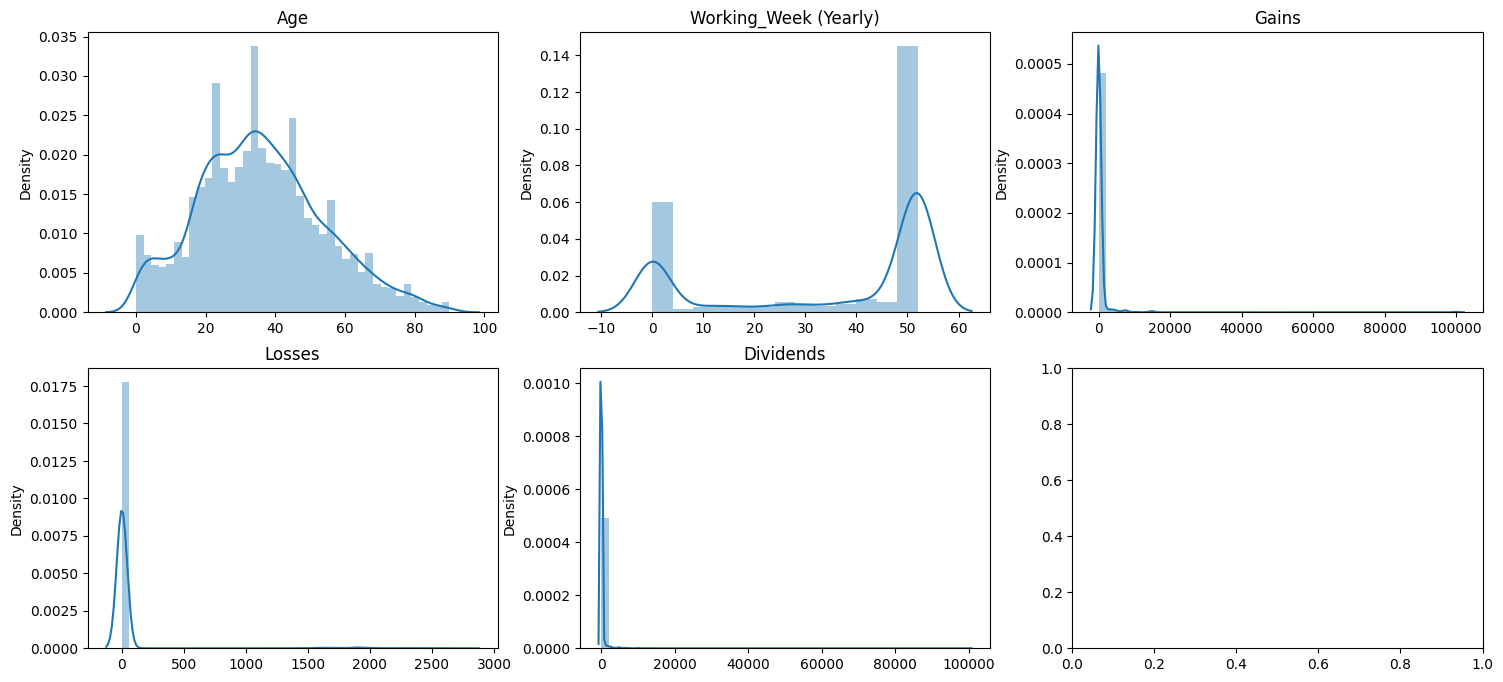

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (18, 8))
ax = ax.flatten()
for i, column in enumerate(NUM):
  sns.distplot(x = test[column], ax = ax[i])
  ax[i].set_title(column)

plt.show()

훈련 데이터와 테스트 데이터 모두 분포가 비슷하다.

### Categorical Features

- Gender

- Education_Status

- Employment_Status: 취업 상태

- Industry_Status: 산업 분야

- Occupation_Status: 직업 분야

- Race: 인종

- Hispanic_Origin: 히스패닉 출신

- Martial_Status: 결혼 여부

- Household_Status: 가족 구성

- Household_Summary: 가족 구성 요약

- Citizenship: 시민권

- Birth_Country

- Birth_Country (Father)

- Birth_Country (Mother)

- Tax_Status

- Income_Status

In [ ]:
data[CAT].nunique()

Gender                     2
Education_Status          17
Employment_Status          8
Industry_Status           24
Occupation_Status         15
Race                       5
Hispanic_Origin           10
Martial_Status             7
Household_Status          31
Household_Summary          8
Citizenship                5
Birth_Country             43
Birth_Country (Father)    43
Birth_Country (Mother)    43
Tax_Status                 6
Income_Status              3
dtype: int64

In [ ]:
for c in CAT:
  group = data.groupby(c)
  print(group['Income'].agg(['mean','median', 'max']))
  print("--------------------------------------------------------------------")

              mean  median   max
Gender                          
F       491.735103   450.0  9916
M       623.620382   500.0  9999
--------------------------------------------------------------------
                                      mean  median   max
Education_Status                                        
Associates degree (Academic)    782.740558   745.0  7700
Associates degree (Vocational)  867.269906   800.0  9916
Bachelors degree                699.367076   549.5  8500
Children                          0.000000     0.0     0
College                         651.468108   600.0  8000
Doctorate degree                575.528736     0.0  9999
Elementary (1-4)                343.440000     0.0  4200
Elementary (5-6)                325.116719     0.0  2100
High Freshman                   366.794595     0.0  9800
High Junior                     483.034146   475.0  7800
High Senior                     459.942149   450.0  5400
High Sophomore                  408.658323   425.0  6009
H

# Part2. Feature Engineering

### Numerial Columns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [ ]:
standard = StandardScaler()
minmax = MinMaxScaler()
maxabs = MaxAbsScaler()
robust = RobustScaler()
normalizer = Normalizer()

In [ ]:
sample_data = data[NUM].drop(['Age','Working_Week (Yearly)'], axis = 1)

In [ ]:
train_data_standard =standard.fit_transform(sample_data)
train_data_minmax =minmax.fit_transform(sample_data)
train_data_maxabs =maxabs.fit_transform(sample_data)
train_data_robust =robust.fit_transform(sample_data)
train_data_normal =normalizer.fit_transform(sample_data)

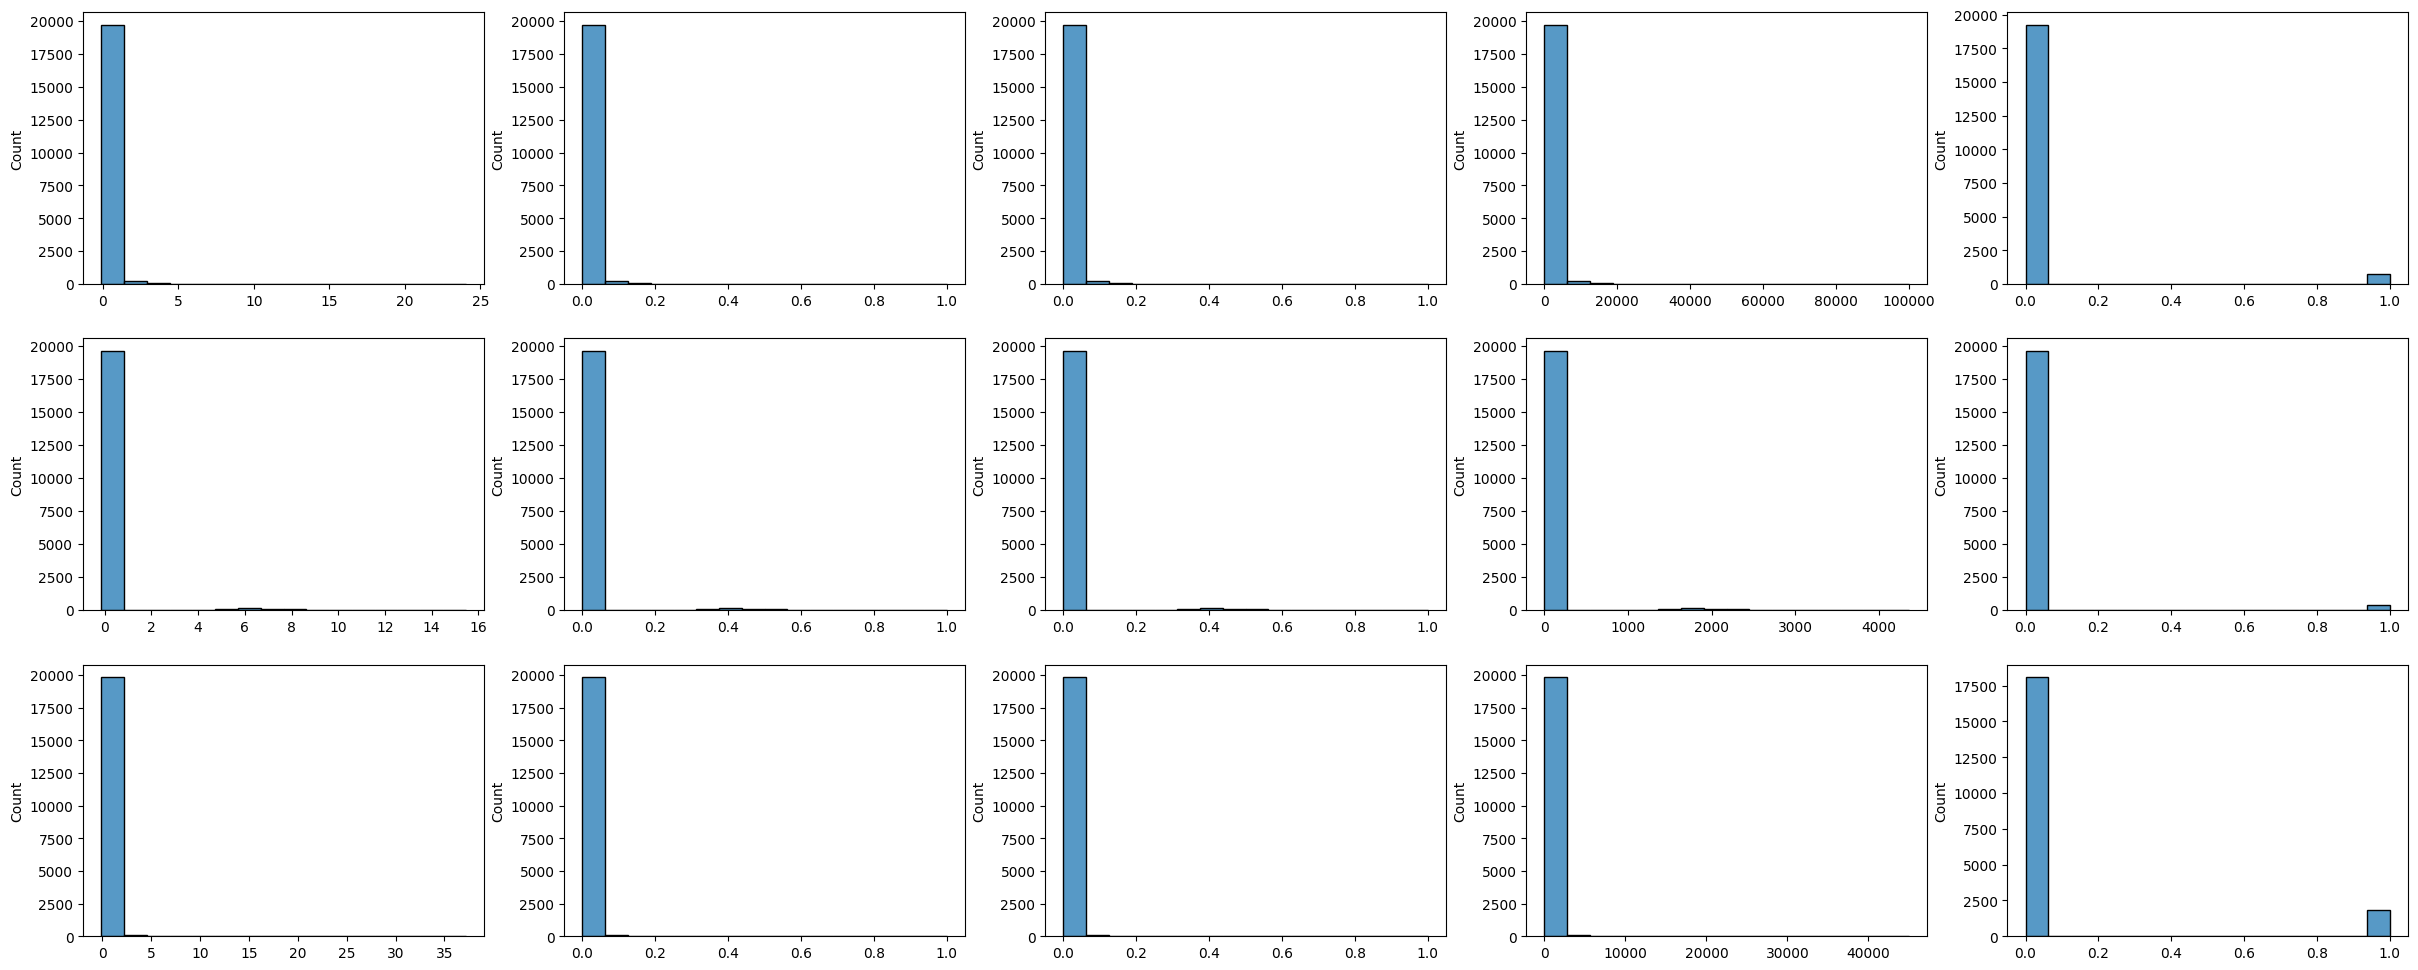

In [ ]:
fig, ax = plt.subplots(3, 5, figsize = (30, 12))
for i, column_name in enumerate(['Gains', 'Losses', 'Dividends']):
  sns.histplot(x = train_data_standard[:, i], ax = ax[i, 0])
  sns.histplot(x = train_data_minmax[:, i], ax = ax[i, 1])
  sns.histplot(x = train_data_maxabs[:, i], ax = ax[i, 2])
  sns.histplot(x = train_data_robust[:, i], ax = ax[i, 3])
  sns.histplot(x = train_data_normal[:, i], ax = ax[i, 4])

데이터 스케일링 -> 효과 미미

##### Working_Week (Yearly)

In [ ]:
data['Working_Month'] = 0
data.loc[data['Working_Week (Yearly)'] == 0, 'Working_Month'] = 0
data.loc[(data['Working_Week (Yearly)'] > 0) & (data['Working_Week (Yearly)'] <= 12), 'Working_Month'] = 1
data.loc[(data['Working_Week (Yearly)'] > 12) & (data['Working_Week (Yearly)'] <= 24), 'Working_Month'] = 2
data.loc[(data['Working_Week (Yearly)'] > 24) & (data['Working_Week (Yearly)'] <= 36), 'Working_Month'] = 3
data.loc[(data['Working_Week (Yearly)'] > 36) & (data['Working_Week (Yearly)'] <= 48), 'Working_Month'] = 4
data.loc[(data['Working_Week (Yearly)'] > 48) & (data['Working_Week (Yearly)'] < 52), 'Working_Month'] = 5
data.loc[data['Working_Week (Yearly)'] == 52, 'Working_Month'] = 6

In [ ]:
test['Working_Month'] = 0
test.loc[test['Working_Week (Yearly)'] == 0, 'Working_Month'] = 0
test.loc[(test['Working_Week (Yearly)'] > 0) & (test['Working_Week (Yearly)'] <= 12), 'Working_Month'] = 1
test.loc[(test['Working_Week (Yearly)'] > 12) & (test['Working_Week (Yearly)'] <= 24), 'Working_Month'] = 2
test.loc[(test['Working_Week (Yearly)'] > 24) & (test['Working_Week (Yearly)'] <= 36), 'Working_Month'] = 3
test.loc[(test['Working_Week (Yearly)'] > 36) & (test['Working_Week (Yearly)'] <= 48), 'Working_Month'] = 4
test.loc[(test['Working_Week (Yearly)'] > 48) & (test['Working_Week (Yearly)'] < 52), 'Working_Month'] = 5
test.loc[test['Working_Week (Yearly)'] == 52, 'Working_Month'] = 6

In [ ]:
data.drop('Working_Week (Yearly)', axis = 1, inplace = True)

##### Gains

In [ ]:
data['Gains_range'] = 0

In [ ]:
data.loc[(data['Gains'] == 99999), 'Gains_range'] = 0
data.loc[(data['Gains'] < 30000) & (data['Gains'] >= 20000), 'Gains_range'] = 1
data.loc[(data['Gains'] < 20000) & (data['Gains'] >= 10000), 'Gains_range'] = 2
data.loc[(data['Gains'] < 10000) & (data['Gains'] >= 5000), 'Gains_range'] = 3
data.loc[(data['Gains'] < 5000) & (data['Gains'] > 0), 'Gains_range'] = 4
data.loc[(data['Gains'] == 0), 'Gains_range'] = 5

In [ ]:
test['Gains_range'] = 0
test.loc[(test['Gains'] == 99999), 'Gains_range'] = 0
test.loc[(test['Gains'] < 30000) & (test['Gains'] >= 20000), 'Gains_range'] = 1
test.loc[(test['Gains'] < 20000) & (test['Gains'] >= 10000), 'Gains_range'] = 2
test.loc[(test['Gains'] < 10000) & (test['Gains'] >= 5000), 'Gains_range'] = 3
test.loc[(test['Gains'] < 5000) & (test['Gains'] > 0), 'Gains_range'] = 4
test.loc[(test['Gains'] == 0), 'Gains_range'] = 5

##### Losses

In [ ]:
data['Losses'].describe()

count    20000.000000
mean        40.202150
std        279.182677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Losses, dtype: float64

In [ ]:
data['Losses_range'] = 0
data.loc[(data['Losses'] == 0), 'Losses_range'] = 0
data.loc[(data['Losses'] > 0) & (data['Losses'] <= 2000), 'Losses_range'] = 1
data.loc[(data['Losses'] > 2000), 'Losses_range'] = 2

In [ ]:
test['Losses_range'] = 0
test.loc[(test['Losses'] == 0), 'Losses_range'] = 0
test.loc[(test['Losses'] > 0) & (test['Losses'] <= 2000), 'Losses_range'] = 1
test.loc[(test['Losses'] > 2000), 'Losses_range'] = 2

##### Dividends

In [ ]:
data['Dividends'].describe()

count    20000.000000
mean       123.451450
std       1206.949429
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45000.000000
Name: Dividends, dtype: float64

In [ ]:
data['Dividends_range'] = 0
data.loc[data['Dividends'] == 0, 'Dividends_range'] = 0
data.loc[(data['Dividends'] > 0) & (data['Dividends'] <= 1000), 'Dividends_range'] = 1
data.loc[(data['Dividends'] > 1000) & (data['Dividends'] <= 5000), 'Dividends_range'] = 2
data.loc[(data['Dividends'] > 5000) & (data['Dividends'] <= 10000), 'Dividends_range'] = 3
data.loc[(data['Dividends'] > 10000), 'Dividends_range'] = 4

In [ ]:
test['Dividends_range'] = 0
test.loc[test['Dividends'] == 0, 'Dividends_range'] = 0
test.loc[(test['Dividends'] > 0) & (test['Dividends'] <= 1000), 'Dividends_range'] = 1
test.loc[(test['Dividends'] > 1000) & (test['Dividends'] <= 5000), 'Dividends_range'] = 2
test.loc[(test['Dividends'] > 5000) & (test['Dividends'] <= 10000), 'Dividends_range'] = 3
test.loc[(test['Dividends'] > 10000), 'Dividends_range'] = 4

### Categorical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
remove_elements = ['Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'ID']
CAT_list = [x for x in test.columns if (x not in remove_elements) and (x not in NUM)]

In [ ]:
data.drop(remove_elements, axis = 1, inplace = True)

In [ ]:
test.drop(remove_elements, axis = 1, inplace = True)

In [ ]:
CAT_list

['Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Summary',
 'Citizenship',
 'Tax_Status',
 'Income_Status',
 'Working_Month',
 'Gains_range',
 'Losses_range',
 'Dividends_range']

In [ ]:
ohe = OneHotEncoder(sparse = False)
ohe_data = pd.DataFrame(ohe.fit_transform(data[CAT_list]))
ohe_data.index = data.index
rest_data = data.drop(CAT_list, axis = 1)
data = pd.concat([rest_data, ohe_data], axis = 1)
data.columns = data.columns.astype(str)

In [ ]:
ohe_test = pd.DataFrame(ohe.transform(test[CAT_list]))
ohe_test.index = test.index
rest_test = test.drop(CAT_list, axis = 1)
test = pd.concat([rest_test, ohe_test], axis = 1)
test.columns = test.columns.astype(str)

# Part 3. Predict Modeling

In [ ]:
from sklearn.linear_model import LinearRegression # 일반 회귀 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet # 규제 회귀 모델
from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
from sklearn.neighbors import KNeighborsRegressor # 최근접 이웃 회귀 모델
from sklearn.tree import DecisionTreeRegressor # 트리 회귀 모델
from sklearn.ensemble import RandomForestRegressor # 앙상블 회귀 모델
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data.drop(['Gains', 'Losses', 'Dividends'], axis = 1, inplace = True)

In [ ]:
data.head()

,Age,Income,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,128,129,130
0,63,425,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1,37,0,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
2,58,860,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3,44,850,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
4,37,570,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


In [ ]:
np.random.seed(42)
train, valid = train_test_split(data, test_size = 0.3, random_state = 0)
train_X = train[train.columns.difference(['Income'])]
train_Y = train['Income']
valid_X = valid[valid.columns.difference(['Income'])]
valid_Y = valid['Income']
X = data[data.columns.difference(['Income'])]
Y = data['Income']

#### Linear Regression

In [ ]:
LR = LinearRegression()
LR.fit(train_X, train_Y)
pred = LR.predict(valid_X)
print('RSME: ', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME:  629.1416803930704


#### Ridge, Lasso, ElasticNet

In [ ]:
ridge = Ridge()
ridge.fit(train_X, train_Y)
pred = ridge.predict(valid_X)
print('RSME: ', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME:  629.0113892012016


In [ ]:
lasso = Lasso()
lasso.fit(train_X, train_Y)
pred = lasso.predict(valid_X)
print('RSME: ', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME:  628.1639955645562


In [ ]:
elastic = ElasticNet()
elastic.fit(train_X, train_Y)
pred = elastic.predict(valid_X)
print('RSME: ', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME:  655.3430806335947


#### ARDRegression, BayesianRidge

In [ ]:
ARD = ARDRegression()
ARD.fit(train_X, train_Y)
pred = ARD.predict(valid_X)
print('RSME', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME 629.0570951363195


In [ ]:
Bayes = BayesianRidge()
Bayes.fit(train_X, train_Y)
pred = Bayes.predict(valid_X)
print('RSME', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME 628.3149275868428


#### KNeighborsRegressor

In [ ]:
KNN = KNeighborsRegressor()
KNN.fit(train_X, train_Y)
pred = KNN.predict(valid_X)
print('RSME', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME 693.0683378041928


#### DecisionTreeRegressor

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(train_X, train_Y)
pred = DT.predict(valid_X)
print('RSME', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME 848.8062328096333


#### RandomForestRegressor

In [ ]:
RF = RandomForestRegressor()
RF.fit(train_X, train_Y)
pred = RF.predict(valid_X)
print('RSME', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME 646.049573490924


### Cross-Validation

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

n = 5

kf = RepeatedStratifiedKFold(n_splits = n, random_state = 0)
xyz = []
rmse = []
std = []
regressor = ['linear', 'Ridge', 'Lasso', 'Elastic Net', 'ARD', 'Bayesian',
             'KNN', 'Decision Tree' ,'Random Forest']

models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), ARDRegression(),
          BayesianRidge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

for i, model in enumerate(models):
  cv_result = (-1) * cross_val_score(model, X, Y, cv = kf, scoring = 'neg_root_mean_squared_error')
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  rmse.append(cv_result)

Model_score = pd.DataFrame({'CV Mean' : xyz, 'Std' : std},
                     index = regressor)
Model_score

,CV Mean,Std
linear,7190763954.30989,18152206606.55556
Ridge,598.26053,19.99370
Lasso,598.69731,19.85453
Elastic Net,626.66425,20.29116
ARD,598.12132,19.87178
Bayesian,597.76625,20.02051
KNN,649.82413,19.14892
Decision Tree,851.80852,28.45495
Random Forest,622.12797,19.58726


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


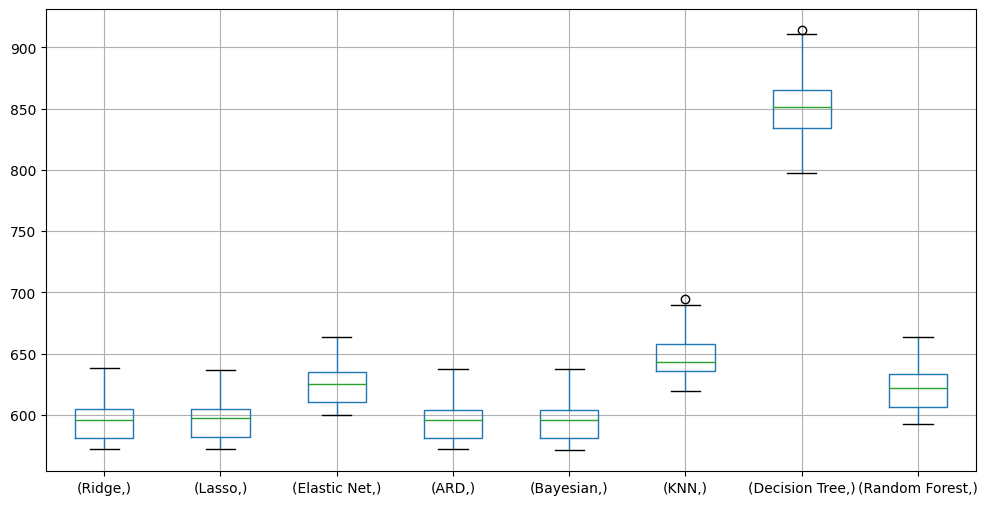

In [ ]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(rmse[1: ], index = [regressor[1:]])
box.T.boxplot()
plt.show()

### Ensembling

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xg
import lightgbm as lg
import catboost as cb

#### Bagging

In [ ]:
bagging_ARD = BaggingRegressor(base_estimator = ARDRegression(), random_state = 0)
bagging_ARD.fit(train_X, train_Y)
pred = bagging_ARD.predict(valid_X)
print('RSME: ', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME:  628.8516679913175


In [ ]:
bagging_bayesian = BaggingRegressor(base_estimator = BayesianRidge(), random_state = 0)
bagging_bayesian.fit(train_X, train_Y)
pred = bagging_bayesian.predict(valid_X)
print('RSME: ', np.sqrt(mean_squared_error(valid_Y, pred)))

RSME:  628.4642124157126


#### AdaBoost

In [ ]:
ada = AdaBoostRegressor()
ada.fit(train_X, train_Y)
pred = ada.predict(valid_X)
print('RMSE: ', np.sqrt(mean_squared_error(pred, valid_Y)))

RMSE:  679.3747065507613


#### Stochastic Gradient Boosting

In [ ]:
grad = GradientBoostingRegressor()
grad.fit(train_X, train_Y)
pred = grad.predict(valid_X)
print('RMSE: ', np.sqrt(mean_squared_error(pred, valid_Y)))

RMSE:  634.5449158213737


#### ExtraTrees

In [ ]:
extra = ExtraTreesRegressor()
extra.fit(train_X, train_Y)
pred = extra.predict(valid_X)
print('RMSE: ', np.sqrt(mean_squared_error(pred, valid_Y)))

RMSE:  741.2102153466985


#### HistGradientBoost

In [ ]:
hist = HistGradientBoostingRegressor()
hist.fit(train_X, train_Y)
pred = hist.predict(valid_X)
print('RMSE: ', np.sqrt(mean_squared_error(pred, valid_Y)))

RMSE:  621.9366839250207


#### XGBoost

In [ ]:
xgb = xg.XGBRegressor()
xgb.fit(train_X, train_Y)
pred = xgb.predict(valid_X)
print('RMSE: ', np.sqrt(mean_squared_error(pred, valid_Y)))

RMSE:  657.6204930793012


#### LightBoost

In [ ]:
lgb = lg.LGBMRegressor()
lgb.fit(train_X, train_Y)
pred = lgb.predict(valid_X)
print('RMSE: ', np.sqrt(mean_squared_error(pred, valid_Y)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 127
[LightGBM] [Info] Start training from score 551.113571
RMSE:  624.7416673138175


#### CatBoost

In [ ]:
cat = cb.CatBoostRegressor(verbose = 0)
cat.fit(train_X, train_Y)
pred = cat.predict(valid_X)
print('RMSE: ', np.sqrt(mean_squared_error(pred, valid_Y)))

RMSE:  634.959140795514


In [ ]:
kf = RepeatedStratifiedKFold(n_splits = n, random_state = 0)
xyz_ensemble = []
rmse_ensemble = []
std_ensemble = []
Ensemble = ['Bagging_ARD', 'Bagging_Bayes', 'GradientBoosting', 'HistGradient', 'xgboost', 'lgboost',
             'catboost']

ensemble_models = [BaggingRegressor(base_estimator = ARDRegression(), random_state = 0), BaggingRegressor(base_estimator = BayesianRidge(), random_state = 0),
          GradientBoostingRegressor(), HistGradientBoostingRegressor(), xg.XGBRegressor(), lg.LGBMRegressor(verbose = 0), cb.CatBoostRegressor(verbose = 0)]

for i, model in enumerate(ensemble_models):
  cv_result = (-1) * cross_val_score(model, X, Y, cv = kf, scoring = 'neg_root_mean_squared_error')
  xyz_ensemble.append(cv_result.mean())
  std_ensemble.append(cv_result.std())
  rmse_ensemble.append(cv_result)
  print(f"Finish {Ensemble[i]}")

Model_score = pd.DataFrame({'CV Mean' : xyz_ensemble, 'Std' : std_ensemble},
                     index = Ensemble)
Model_score

Finish Bagging_ARD
Finish Bagging_Bayes
Finish GradientBoosting
Finish HistGradient
Finish xgboost
Finish lgboost
Finish catboost


,CV Mean,Std
Bagging_ARD,598.06691,19.87523
Bagging_Bayes,597.85618,19.93873
GradientBoosting,599.64843,20.12332
HistGradient,592.20872,18.74959
xgboost,623.34448,18.33879
lgboost,593.56381,18.72875
catboost,600.29639,19.54347


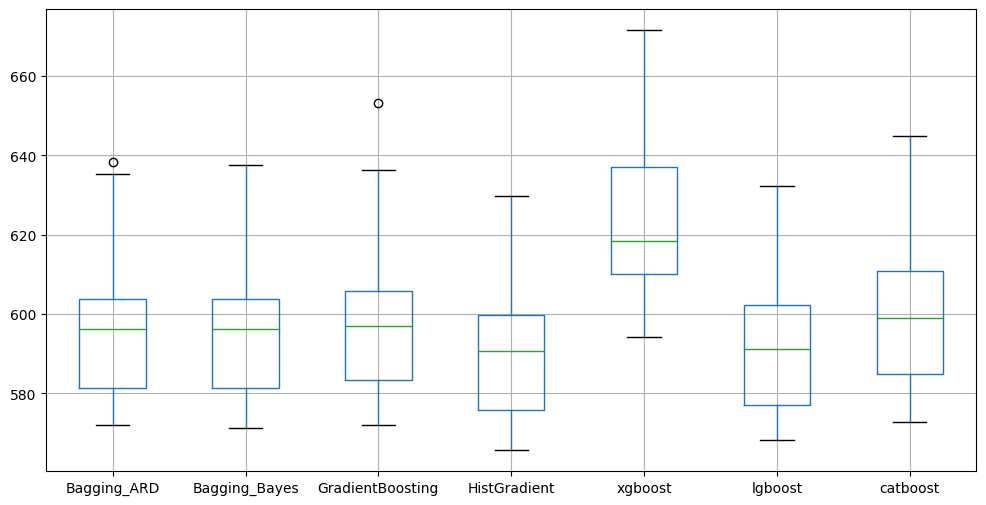

In [ ]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(rmse_ensemble, index = Ensemble)
box.T.boxplot()
plt.show()

### Hyper-Parameter Tuning